Loaded 117 rows and 7 columns.


,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-11-01 20:16:18,Apple iPhone 15 Pro A2848 128GB Unlocked - Ver...,484.99,1099.99,Shipping info unavailable,https://www.ebay.com/itm/356227875584?_trkparm...,55.91
1,2025-11-01 20:16:18,"Acer Portable Monitor 15.6"" Full HD IPS 1920x1...",NaN,139.99,Shipping info unavailable,https://www.ebay.com/itm/256905415945?_trkparm...,0.00
2,2025-11-01 20:16:18,Apple iPhone 14 Pro Max 128GB Network Unlocked...,NaN,899.99,Shipping info unavailable,https://www.ebay.com/itm/355094939620?_trkparm...,0.00
3,2025-11-01 20:16:18,"Acer 15.6i"" Portable Monitor FullHD 1920x1080 ...",NaN,139.99,Shipping info unavailable,https://www.ebay.com/itm/267229717756?_trkparm...,0.00
4,2025-11-01 20:16:18,"Acer 15.6"" Portable Monitor FHD 1920x1080 60Hz...",NaN,99.99,Shipping info unavailable,https://www.ebay.com/itm/277333168153?_trkparm...,0.00



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            117 non-null    object 
 1   title                101 non-null    object 
 2   price                71 non-null     float64
 3   original_price       101 non-null    float64
 4   shipping             117 non-null    object 
 5   item_url             101 non-null    object 
 6   discount_percentage  117 non-null    float64
dtypes: float64(3), object(4)
memory usage: 6.5+ KB
None

--- Missing Values ---
timestamp               0
title                  16
price                  46
original_price         16
shipping                0
item_url               16
discount_percentage     0
dtype: int64

--- Statistical Summary ---


,timestamp,title,price,original_price,shipping,item_url,discount_percentage
count,117,101,71.000000,101.000000,117,101,117.000000
unique,1,92,NaN,NaN,1,101,NaN
top,2025-11-01 20:16:18,REDTIGER Dash Camera 4K Front and Rear Dash Ca...,NaN,NaN,Shipping info unavailable,https://www.ebay.com/itm/356227875584?_trkparm...,NaN
freq,117,3,NaN,NaN,117,1,NaN
mean,NaN,NaN,485.710000,644.532772,NaN,NaN,16.750855
std,NaN,NaN,684.544002,676.698748,NaN,NaN,23.808536
min,NaN,NaN,13.990000,13.990000,NaN,NaN,0.000000
25%,NaN,NaN,74.245000,129.490000,NaN,NaN,0.000000
50%,NaN,NaN,234.990000,409.990000,NaN,NaN,0.000000
75%,NaN,NaN,537.000000,1099.000000,NaN,NaN,37.330000


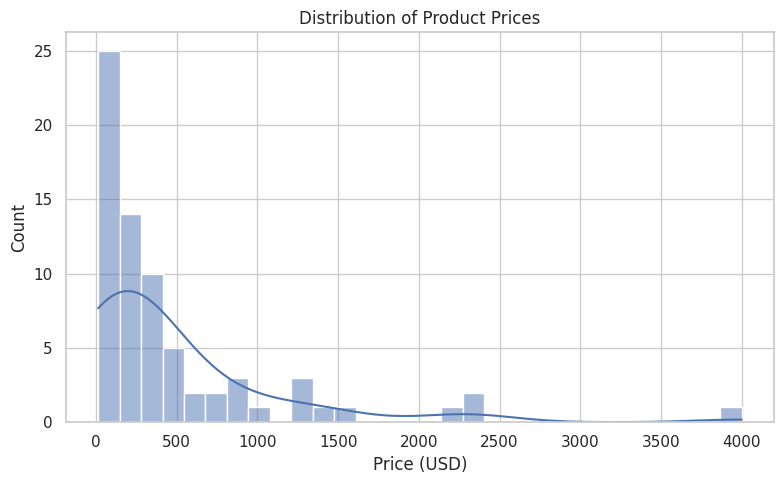

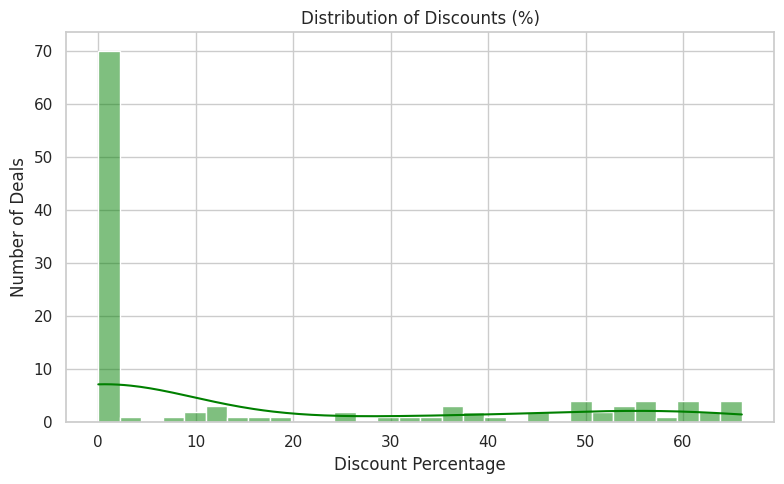

/tmp/ipython-input-415272933.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="discount_percentage", y="title", data=top_discounts, palette="Greens_r")


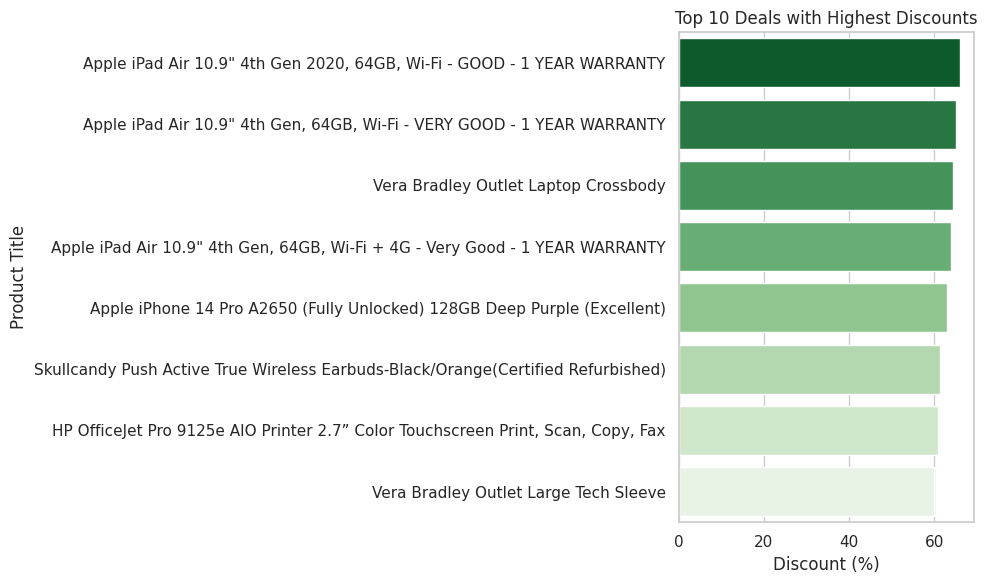

/tmp/ipython-input-415272933.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.values, y=shipping_counts.index, palette="Blues_r")


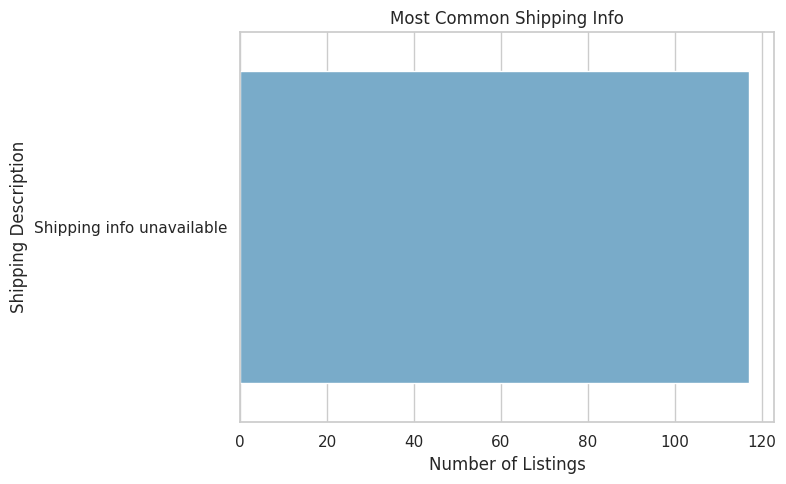


🧩 Insights Summary:
- Average deal discount: 16.75%
- Median product price: $234.99
- Cheapest product: $13.99
- Most expensive product: $3999.99
- Distinct shipping descriptions: 1


In [2]:
# EDA.ipynb
# ----------
# Exploratory Data Analysis for eBay Tech Deals dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Visualization settings
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", None)

#  Load cleaned data
df = pd.read_csv("cleaned_ebay_deals.csv")
print(f"Loaded {len(df)} rows and {len(df.columns)} columns.")
display(df.head())

#  Basic summary and missing values
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isna().sum())
print("\n--- Statistical Summary ---")
display(df.describe(include="all"))

#  Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#  Discount percentage distribution
plt.figure(figsize=(8,5))
sns.histplot(df["discount_percentage"], bins=30, kde=True, color="green")
plt.title("Distribution of Discounts (%)")
plt.xlabel("Discount Percentage")
plt.ylabel("Number of Deals")
plt.tight_layout()
plt.show()

#  Top 10 biggest discounts
top_discounts = df.sort_values("discount_percentage", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="discount_percentage", y="title", data=top_discounts, palette="Greens_r")
plt.title("Top 10 Deals with Highest Discounts")
plt.xlabel("Discount (%)")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

#  Shipping info breakdown
shipping_counts = df["shipping"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=shipping_counts.values, y=shipping_counts.index, palette="Blues_r")
plt.title("Most Common Shipping Info")
plt.xlabel("Number of Listings")
plt.ylabel("Shipping Description")
plt.tight_layout()
plt.show()

#  Insights summary
print("\n Insights Summary:")
print(f"- Average deal discount: {df['discount_percentage'].mean():.2f}%")
print(f"- Median product price: ${df['price'].median():.2f}")
print(f"- Cheapest product: ${df['price'].min():.2f}")
print(f"- Most expensive product: ${df['price'].max():.2f}")
print(f"- Distinct shipping descriptions: {df['shipping'].nunique()}")
